# Outline of Notebook Contents: #

* Constructing a correlation matrix of both the predictor and response variables 
* Construct a boxplot and histogram of (log-odds) mortality rate


In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.impute import KNNImputer

np.random.seed(109)

In [2]:
def clean_data():
    X_data = pd.read_csv('NHANESI_X.csv')
    y_data = pd.read_csv('NHANESI_y.csv')

    X_data = X_data.drop('Unnamed: 0', axis = 1)
    y_data = y_data.drop('Unnamed: 0', axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.2,  random_state = 109, shuffle=True 
    )
    
    combined = pd.concat([X_data, y_data], axis = 1)
    combined_dropped = combined.dropna()
    X_data_dropped = combined_dropped[['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure']]
    y_data_dropped = combined_dropped[['y']]
    
    imputer = KNNImputer(n_neighbors=1)
    imputer_result = imputer.fit_transform(X_data)
    X_data_imputed = pd.DataFrame(imputer_result, columns = X_data.columns)
    imputed = pd.concat([X_data_imputed, y_data], axis = 1)
    
    return combined_dropped, X_data_dropped, y_data_dropped, imputed, X_data_imputed, y_data

In [3]:
dropped, X_dropped, y_dropped, imputed, X_imputed, y_imputed = clean_data()

### Getting the Correlation Matrices:

Dropped DF Correlation Matrix:


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,y
Age,1.000000,0.263400,-0.025665,-0.008959,0.014718,0.208027,-0.199345,0.351018,-0.021265,0.087770,-0.033123,-0.155667,0.510604,-0.245259,0.076600,-0.068769,0.109757,0.505331,0.550606
Diastolic BP,0.263400,1.000000,-0.042233,0.137374,0.067371,0.053945,0.013007,0.169601,-0.047725,0.019155,0.142616,-0.139052,0.701384,0.017172,-0.049950,-0.003574,0.367024,0.228974,0.196326
Poverty index,-0.025665,-0.042233,1.000000,-0.151401,0.027313,-0.133749,0.079018,0.028238,0.091832,0.038623,-0.083184,-0.068519,-0.078905,-0.020123,0.090705,0.009956,-0.086935,-0.076975,-0.078893
Race,-0.008959,0.137374,-0.151401,1.000000,-0.040210,0.179213,-0.096135,-0.018029,-0.077274,-0.142108,0.212328,0.012339,0.118865,-0.018166,-0.065060,-0.107418,0.091959,0.062200,0.054913
Red blood cells,0.014718,0.067371,0.027313,-0.040210,1.000000,-0.093165,0.035966,0.012462,0.058178,0.083691,0.038367,-0.156992,0.048091,-0.023849,0.062435,0.019086,0.060813,0.016571,0.006333
Sedimentation rate,0.208027,0.053945,-0.133749,0.179213,-0.093165,1.000000,-0.263014,0.124130,-0.173101,-0.104706,0.165542,0.270968,0.163140,0.014881,-0.161675,0.015778,0.135682,0.183477,0.161484
Serum Albumin,-0.199345,0.013007,0.079018,-0.096135,0.035966,-0.263014,1.000000,0.061070,0.110436,0.159124,0.458180,-0.113590,-0.058108,0.122741,0.044447,0.015113,-0.056252,-0.088838,-0.144892
Serum Cholesterol,0.351018,0.169601,0.028238,-0.018029,0.012462,0.124130,0.061070,1.000000,0.044567,0.073676,0.064698,0.000666,0.228813,0.028750,0.021419,0.011164,0.150966,0.188864,0.187703
Serum Iron,-0.021265,-0.047725,0.091832,-0.077274,0.058178,-0.173101,0.110436,0.044567,1.000000,-0.010136,0.010141,-0.098922,-0.060438,0.019129,0.906151,-0.081658,-0.121322,-0.047753,-0.015497
Serum Magnesium,0.087770,0.019155,0.038623,-0.142108,0.083691,-0.104706,0.159124,0.073676,-0.010136,1.000000,0.036181,-0.081366,0.009813,-0.048819,0.006353,-0.003525,-0.027422,-0.000561,0.002596


X_dropped Correlation Matrix:


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
Age,1.000000,0.263400,-0.025665,-0.008959,0.014718,0.208027,-0.199345,0.351018,-0.021265,0.087770,-0.033123,-0.155667,0.510604,-0.245259,0.076600,-0.068769,0.109757,0.505331
Diastolic BP,0.263400,1.000000,-0.042233,0.137374,0.067371,0.053945,0.013007,0.169601,-0.047725,0.019155,0.142616,-0.139052,0.701384,0.017172,-0.049950,-0.003574,0.367024,0.228974
Poverty index,-0.025665,-0.042233,1.000000,-0.151401,0.027313,-0.133749,0.079018,0.028238,0.091832,0.038623,-0.083184,-0.068519,-0.078905,-0.020123,0.090705,0.009956,-0.086935,-0.076975
Race,-0.008959,0.137374,-0.151401,1.000000,-0.040210,0.179213,-0.096135,-0.018029,-0.077274,-0.142108,0.212328,0.012339,0.118865,-0.018166,-0.065060,-0.107418,0.091959,0.062200
Red blood cells,0.014718,0.067371,0.027313,-0.040210,1.000000,-0.093165,0.035966,0.012462,0.058178,0.083691,0.038367,-0.156992,0.048091,-0.023849,0.062435,0.019086,0.060813,0.016571
Sedimentation rate,0.208027,0.053945,-0.133749,0.179213,-0.093165,1.000000,-0.263014,0.124130,-0.173101,-0.104706,0.165542,0.270968,0.163140,0.014881,-0.161675,0.015778,0.135682,0.183477
Serum Albumin,-0.199345,0.013007,0.079018,-0.096135,0.035966,-0.263014,1.000000,0.061070,0.110436,0.159124,0.458180,-0.113590,-0.058108,0.122741,0.044447,0.015113,-0.056252,-0.088838
Serum Cholesterol,0.351018,0.169601,0.028238,-0.018029,0.012462,0.124130,0.061070,1.000000,0.044567,0.073676,0.064698,0.000666,0.228813,0.028750,0.021419,0.011164,0.150966,0.188864
Serum Iron,-0.021265,-0.047725,0.091832,-0.077274,0.058178,-0.173101,0.110436,0.044567,1.000000,-0.010136,0.010141,-0.098922,-0.060438,0.019129,0.906151,-0.081658,-0.121322,-0.047753
Serum Magnesium,0.087770,0.019155,0.038623,-0.142108,0.083691,-0.104706,0.159124,0.073676,-0.010136,1.000000,0.036181,-0.081366,0.009813,-0.048819,0.006353,-0.003525,-0.027422,-0.000561


Imputed DF Correlation Matrix:


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,y
Age,1.000000,0.260150,-0.030336,-0.003557,0.030538,0.207435,-0.202611,0.346071,-0.016897,0.083664,-0.036282,-0.159728,0.507829,-0.248023,0.081067,-0.066111,0.096906,0.502980,0.552637
Diastolic BP,0.260150,1.000000,-0.060464,0.139949,0.053036,0.063750,0.012697,0.168044,-0.043967,0.019320,0.145307,-0.138018,0.699397,0.019954,-0.048895,-0.000176,0.346933,0.226472,0.198034
Poverty index,-0.030336,-0.060464,1.000000,-0.162852,0.023129,-0.141563,0.078224,0.021656,0.088710,0.041488,-0.090320,-0.066834,-0.091296,-0.017126,0.086054,0.012390,-0.087678,-0.080639,-0.076834
Race,-0.003557,0.139949,-0.162852,1.000000,-0.021594,0.173860,-0.096122,-0.016785,-0.076524,-0.148282,0.223579,0.011563,0.118723,-0.020819,-0.063119,-0.101391,0.096245,0.060373,0.062693
Red blood cells,0.030538,0.053036,0.023129,-0.021594,1.000000,-0.034265,0.011940,-0.004661,0.040528,0.061317,-0.002208,-0.122050,0.042595,-0.033672,0.050149,0.017317,0.037731,0.019451,0.021323
Sedimentation rate,0.207435,0.063750,-0.141563,0.173860,-0.034265,1.000000,-0.249370,0.123590,-0.175114,-0.094852,0.152329,0.255341,0.169919,0.011087,-0.161848,0.009723,0.128763,0.185574,0.161729
Serum Albumin,-0.202611,0.012697,0.078224,-0.096122,0.011940,-0.249370,1.000000,0.059050,0.111313,0.161717,0.453112,-0.111634,-0.063672,0.120015,0.045508,0.015919,-0.054240,-0.096022,-0.149984
Serum Cholesterol,0.346071,0.168044,0.021656,-0.016785,-0.004661,0.123590,0.059050,1.000000,0.042910,0.062945,0.065038,0.002212,0.229361,0.030175,0.018212,0.013519,0.146104,0.190355,0.180776
Serum Iron,-0.016897,-0.043967,0.088710,-0.076524,0.040528,-0.175114,0.111313,0.042910,1.000000,-0.005187,0.003120,-0.107358,-0.057481,0.014689,0.905566,-0.078046,-0.126294,-0.046591,-0.011602
Serum Magnesium,0.083664,0.019320,0.041488,-0.148282,0.061317,-0.094852,0.161717,0.062945,-0.005187,1.000000,0.033368,-0.081849,0.005156,-0.044119,0.008521,0.003031,-0.031072,-0.006460,-0.002360


X_imputed Correlation Matrix:


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
Age,1.000000,0.260150,-0.030336,-0.003557,0.030538,0.207435,-0.202611,0.346071,-0.016897,0.083664,-0.036282,-0.159728,0.507829,-0.248023,0.081067,-0.066111,0.096906,0.502980
Diastolic BP,0.260150,1.000000,-0.060464,0.139949,0.053036,0.063750,0.012697,0.168044,-0.043967,0.019320,0.145307,-0.138018,0.699397,0.019954,-0.048895,-0.000176,0.346933,0.226472
Poverty index,-0.030336,-0.060464,1.000000,-0.162852,0.023129,-0.141563,0.078224,0.021656,0.088710,0.041488,-0.090320,-0.066834,-0.091296,-0.017126,0.086054,0.012390,-0.087678,-0.080639
Race,-0.003557,0.139949,-0.162852,1.000000,-0.021594,0.173860,-0.096122,-0.016785,-0.076524,-0.148282,0.223579,0.011563,0.118723,-0.020819,-0.063119,-0.101391,0.096245,0.060373
Red blood cells,0.030538,0.053036,0.023129,-0.021594,1.000000,-0.034265,0.011940,-0.004661,0.040528,0.061317,-0.002208,-0.122050,0.042595,-0.033672,0.050149,0.017317,0.037731,0.019451
Sedimentation rate,0.207435,0.063750,-0.141563,0.173860,-0.034265,1.000000,-0.249370,0.123590,-0.175114,-0.094852,0.152329,0.255341,0.169919,0.011087,-0.161848,0.009723,0.128763,0.185574
Serum Albumin,-0.202611,0.012697,0.078224,-0.096122,0.011940,-0.249370,1.000000,0.059050,0.111313,0.161717,0.453112,-0.111634,-0.063672,0.120015,0.045508,0.015919,-0.054240,-0.096022
Serum Cholesterol,0.346071,0.168044,0.021656,-0.016785,-0.004661,0.123590,0.059050,1.000000,0.042910,0.062945,0.065038,0.002212,0.229361,0.030175,0.018212,0.013519,0.146104,0.190355
Serum Iron,-0.016897,-0.043967,0.088710,-0.076524,0.040528,-0.175114,0.111313,0.042910,1.000000,-0.005187,0.003120,-0.107358,-0.057481,0.014689,0.905566,-0.078046,-0.126294,-0.046591
Serum Magnesium,0.083664,0.019320,0.041488,-0.148282,0.061317,-0.094852,0.161717,0.062945,-0.005187,1.000000,0.033368,-0.081849,0.005156,-0.044119,0.008521,0.003031,-0.031072,-0.006460


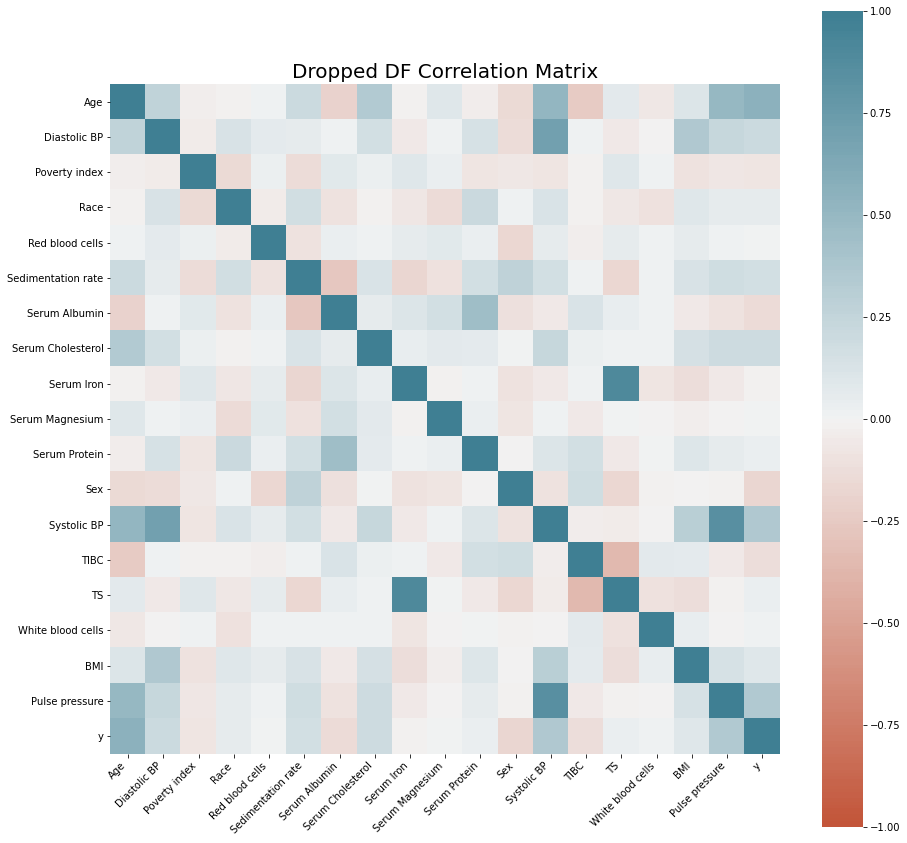

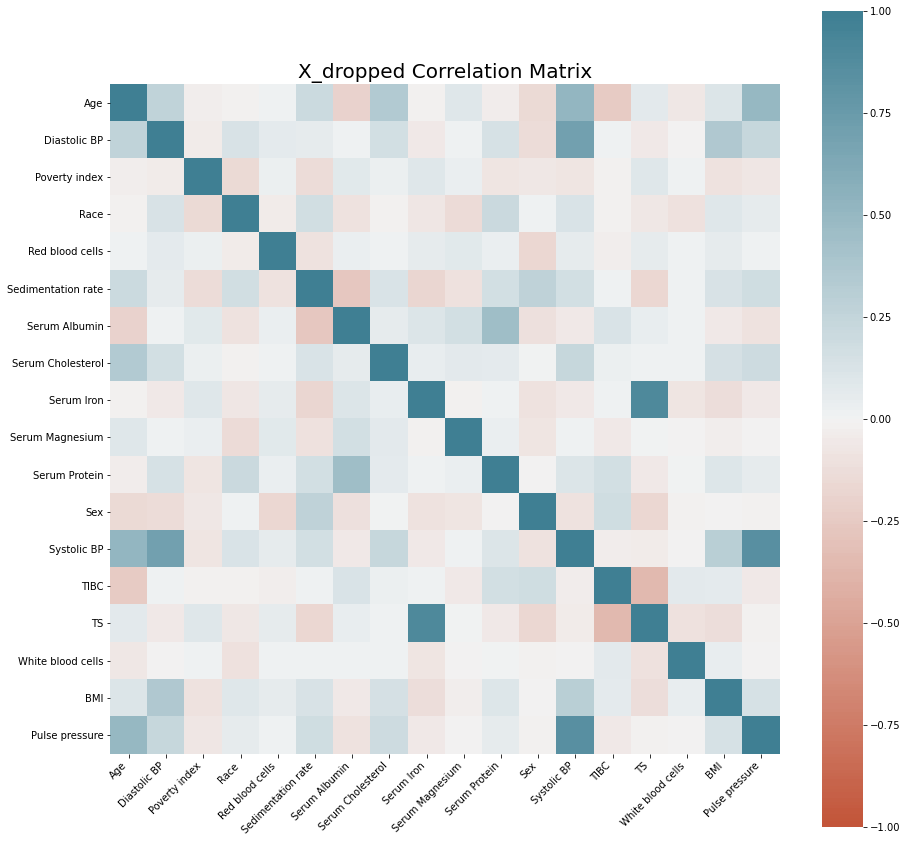

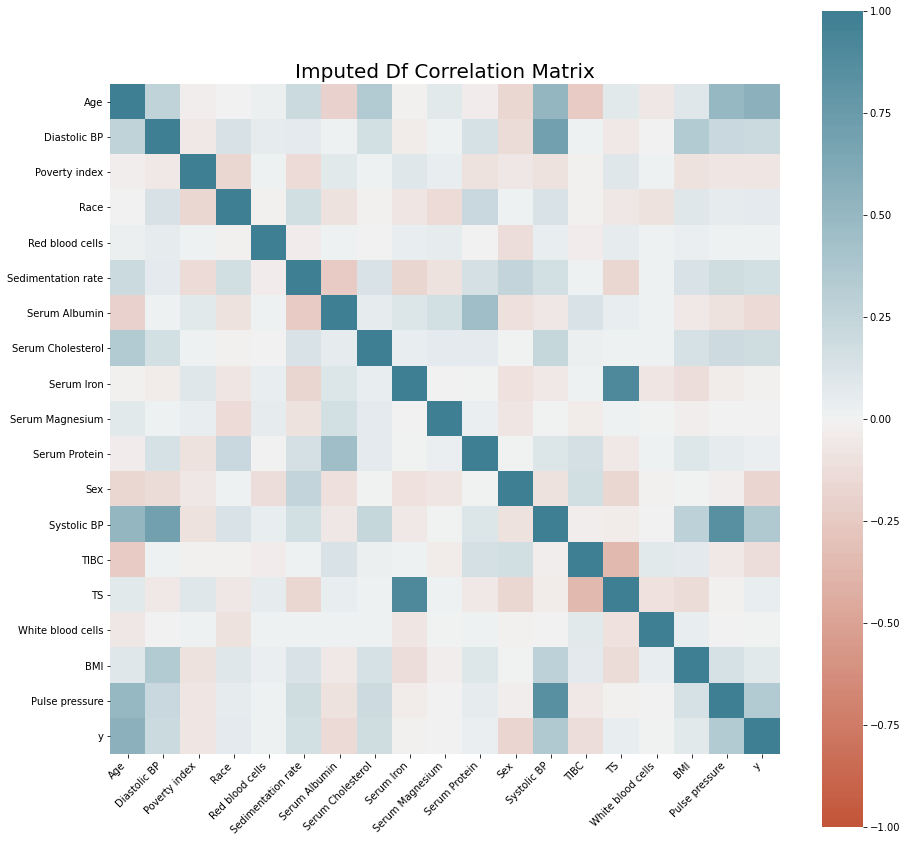

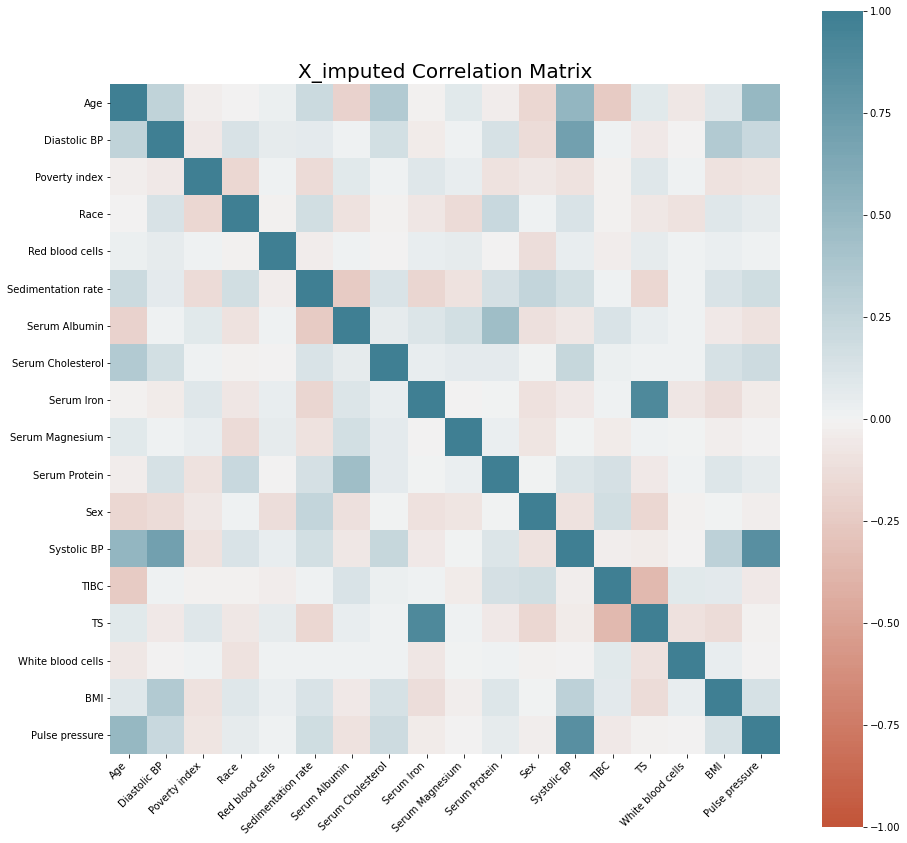

In [4]:
# Dealing with Data with Dropped NaN Values First:

print("Dropped DF Correlation Matrix:")
dropped_corr = dropped.corr()
display(dropped_corr)

print("X_dropped Correlation Matrix:")
X_dropped_corr = X_dropped.corr()
display(X_dropped_corr)

# Then the Imputed Data Next:
print("Imputed DF Correlation Matrix:")
imputed_corr = imputed.corr()
display(imputed_corr)

print("X_imputed Correlation Matrix:")
X_imputed_corr = X_imputed.corr()
display(X_imputed_corr)

# Visually digestible:
ax1 = plt.figure(figsize=(15,15))
ax1 = sns.heatmap(
    dropped_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax1.set_title("Dropped DF Correlation Matrix", fontsize=20)

plt.show()

ax2 = plt.figure(figsize=(15,15))
ax2 = sns.heatmap(
    X_dropped_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax2.set_xticklabels(
    ax2.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax2.set_title("X_dropped Correlation Matrix", fontsize=20)

plt.show()

ax3 = plt.figure(figsize=(15,15))
ax3 = sns.heatmap(
    imputed_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax3.set_xticklabels(
    ax3.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax3.set_title("Imputed Df Correlation Matrix", fontsize=20)

plt.show()

ax4 = plt.figure(figsize=(15,15))
ax4 = sns.heatmap(
    X_imputed_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax4.set_xticklabels(
    ax4.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax4.set_title("X_imputed Correlation Matrix", fontsize=20)

plt.show()

**At first glance, it seems that log-odds mortality rate is moderately strongly correalted with age, systolic BP, as well as pulse pressure.**

### Histogram and Box-Plot of Mortality Rate Log-Odds:

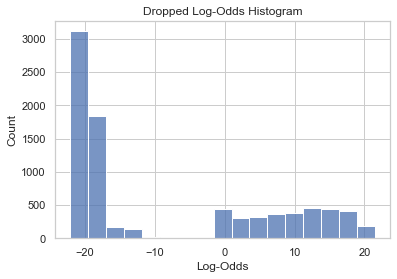

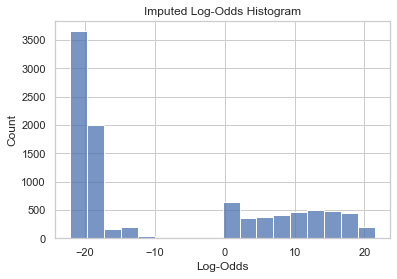

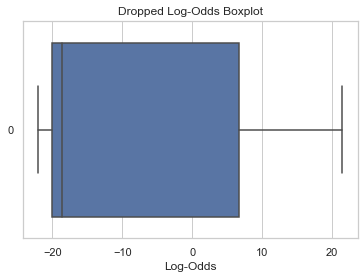

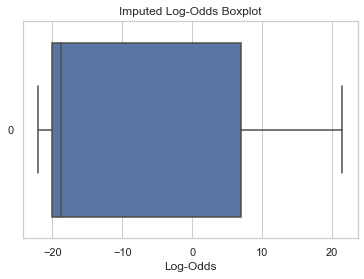

In [23]:
# Dropped Log-Odds Histogram
fig1 = plt.figure()
sns.histplot(y_dropped.to_numpy(), legend=False)
plt.title("Dropped Log-Odds Histogram")
plt.xlabel("Log-Odds")
plt.ylabel("Count")
plt.show()

# Imputed Log-Odds Histogram
fig2 = plt.figure()
sns.histplot(y_imputed.to_numpy(), legend=False)
plt.title("Imputed Log-Odds Histogram")
plt.xlabel("Log-Odds")
plt.ylabel("Count")
plt.show()

fig3 = plt.figure()
sns.set_theme(style="whitegrid")
sns.boxplot(data=y_dropped.to_numpy(), orient="h")
plt.title("Dropped Log-Odds Boxplot")
plt.xlabel("Log-Odds")
plt.show()

fig4 = plt.figure()
sns.set_theme(style="whitegrid")
sns.boxplot(data=y_imputed.to_numpy(), orient="h")
plt.title("Imputed Log-Odds Boxplot")
plt.xlabel("Log-Odds")
plt.show()